# Bank Customer Churn Analysis
### Data Analysis Final Project – July 2025

**Objective**: Analyze customer demographic and financial data to understand customer churn and recommend strategies to improve retention.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
file_path = 'Bank_Churn_Messy.xlsx'
customer_df = pd.read_excel(file_path, sheet_name='Customer_Info')
account_df = pd.read_excel(file_path, sheet_name='Account_Info')

In [3]:
customer_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [4]:
account_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.2+ KB


In [6]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerId      10002 non-null  int64 
 1   Balance         10002 non-null  object
 2   NumOfProducts   10002 non-null  int64 
 3   HasCrCard       10002 non-null  object
 4   Tenure          10002 non-null  int64 
 5   IsActiveMember  10002 non-null  object
 6   Exited          10002 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 547.1+ KB


In [7]:
customer_df.info

<bound method DataFrame.info of        CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0        15634602   Hargrave          619       FRA  Female  42.0       2   
1        15647311       Hill          608     Spain  Female  41.0       1   
2        15619304       Onio          502    French  Female  42.0       8   
3        15701354       Boni          699       FRA  Female  39.0       1   
4        15737888   Mitchell          850     Spain  Female  43.0       2   
...           ...        ...          ...       ...     ...   ...     ...   
9996     15569892  Johnstone          516    French    Male  35.0      10   
9997     15584532        Liu          709       FRA  Female  36.0       7   
9998     15682355  Sabbatini          772   Germany    Male  42.0       3   
9999     15628319     Walker          792    French  Female  28.0       4   
10000    15628319     Walker          792    French  Female  28.0       4   

      EstimatedSalary  
0          €101348.

In [8]:
account_df.info

<bound method DataFrame.info of        CustomerId     Balance  NumOfProducts HasCrCard  Tenure IsActiveMember  \
0        15634602        €0.0              1       Yes       2            Yes   
1        15634602        €0.0              1       Yes       2            Yes   
2        15647311   €83807.86              1       Yes       1            Yes   
3        15619304   €159660.8              3        No       8             No   
4        15701354        €0.0              2        No       1             No   
...           ...         ...            ...       ...     ...            ...   
9997     15569892   €57369.61              1       Yes      10            Yes   
9998     15584532        €0.0              1       Yes       7            Yes   
9999     15682355   €75075.31              2        No       3             No   
10000    15628319  €130142.79              1        No       4             No   
10001    15628319  €130142.79              1        No       4             No

## Clean Data

In [9]:
customer_df.columns = customer_df.columns.str.strip().str.replace(" ", "_")

In [10]:
account_df.columns = account_df.columns.str.strip().str.replace(" ", "_")

In [11]:
customer_df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
dtype: int64

In [12]:
account_df.isnull().sum()

CustomerId        0
Balance           0
NumOfProducts     0
HasCrCard         0
Tenure            0
IsActiveMember    0
Exited            0
dtype: int64

In [13]:
customer_df.dropna(inplace=True)

In [14]:
account_df.dropna(inplace=True)

In [15]:
customer_df.drop_duplicates(inplace=True)

In [16]:
account_df.drop_duplicates(inplace=True)

## Merge Data

In [17]:
#'CustomerId' is the common key
merged_df = pd.merge(customer_df, account_df, on='CustomerId', how='inner')

In [18]:
merged_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
2,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,2,Yes,0


### Churn Vs No Churn

In [19]:
# set style
sns.set(style="whitegrid")

<Axes: xlabel='Exited', ylabel='count'>

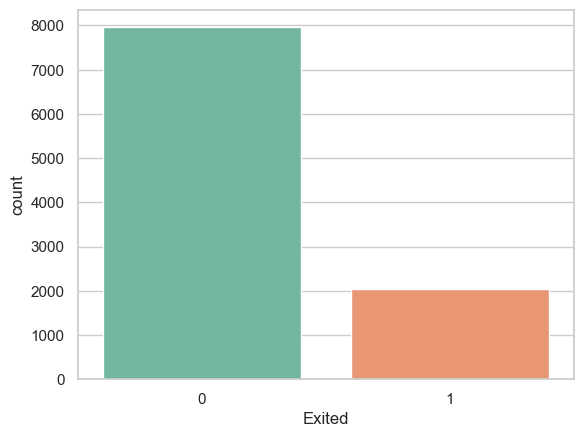

In [20]:
sns.countplot(x='Exited', data=merged_df, hue='Exited', palette='Set2', legend=False)

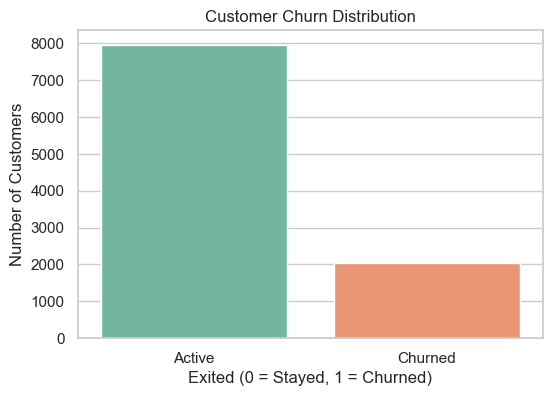

In [21]:
# # Bar plot of churn counts
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=merged_df, hue='Exited', palette='Set2', legend=False)
plt.title('Customer Churn Distribution')
plt.xlabel('Exited (0 = Stayed, 1 = Churned)')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['Active', 'Churned'])
plt.show()

In [22]:
# Calculate churn values
churn_counts = merged_df['Exited'].value_counts()
labels = ['Active', 'Churned']
colors = ['#66b3ff', '#ff9999']

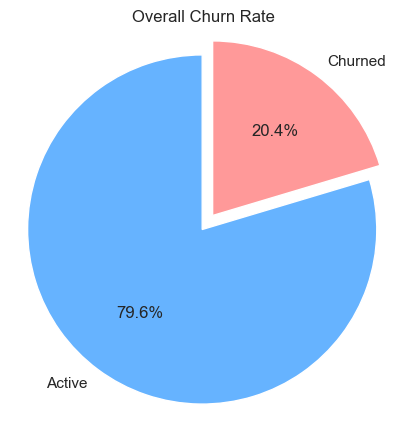

In [23]:
# Plot
plt.figure(figsize=(5,5))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))
plt.title('Overall Churn Rate')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()

 Overall Churn Rate

The visualizations above show the distribution of customers who stayed with the bank versus those who churned. 
This helps us understand the scale of the churn problem at a glance.


In [29]:
# Save the figure
plt.savefig('Overall Churn Rate.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

### Age Distribution by Churn

In [24]:
merged_df['Geography'].unique()

array(['FRA', 'Spain', 'French', 'France', 'Germany'], dtype=object)

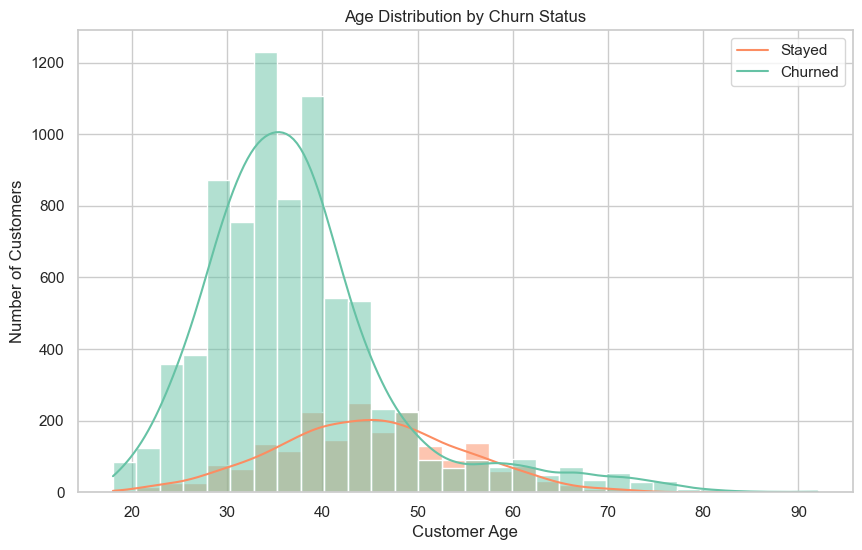

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data=merged_df, x='Age', hue='Exited', bins=30, kde=True, palette='Set2')
plt.title('Age Distribution by Churn Status')
plt.xlabel('Customer Age')
plt.ylabel('Number of Customers')
plt.legend(['Stayed', 'Churned'])
plt.show()

#### Churn Rate by Age Group
Groups are categorized into age buckets (e.g., 18–25, 26–35, etc.).

In [26]:
# Create age bins
bins = [18, 25, 35, 45, 55, 65, 100] 
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '65+']
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=bins, labels=labels)

In [27]:
# Churn rate by age group
churn_by_age = merged_df.groupby('Age_Group')['Exited'].mean() * 100
churn_by_age = churn_by_age.reset_index()

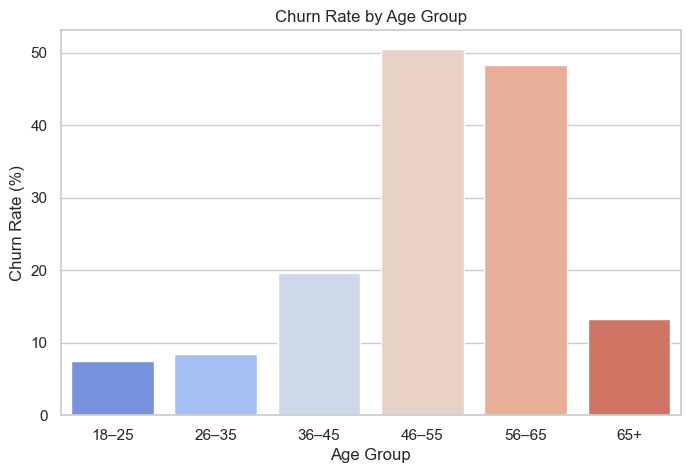

In [28]:
# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Age_Group', y='Exited', data=churn_by_age, palette='coolwarm')
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Age Group')
plt.show()

 Customers aged from 46-55 have the highest churn Rate of 50%

<Axes: xlabel='Age_Group', ylabel='Exited'>

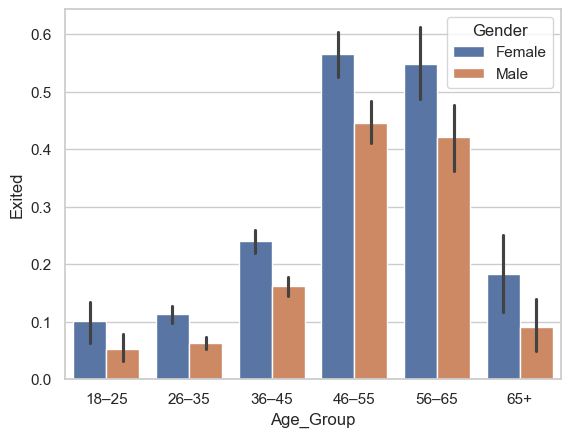

In [29]:
sns.barplot(x='Age_Group', y='Exited', hue='Gender', data=merged_df)

### Average Financial Metrics by Age Group
Example: CreditScore, Balance, NumOfProducts

In [30]:
# Group by age group and calculate average
age_financials = merged_df.groupby('Age_Group')[['CreditScore', 'Balance', 'NumOfProducts']].mean().reset_index()

TypeError: agg function failed [how->mean,dtype->object]

In [31]:
merged_df['Balance'].dtype

dtype('O')

Remove Non-Numeric Characters and Convert to Float
Here’s how to clean the Balance column

In [32]:
# Remove € symbols and convert to float
merged_df['Balance'] = merged_df['Balance'].replace('[€,]', '', regex=True).astype(float)

 Confirm All Columns Are Numeric
Also make sure other columns (CreditScore, NumOfProducts) are numeric:

In [33]:
merged_df['CreditScore'] = pd.to_numeric(merged_df['CreditScore'], errors='coerce')
merged_df['NumOfProducts'] = pd.to_numeric(merged_df['NumOfProducts'], errors='coerce')
# errors='coerce' will convert non-numeric entries to NaN. You can then use .dropna() or .fillna() as needed.

In [34]:
age_financials = merged_df.groupby('Age_Group')[['CreditScore', 'Balance', 'NumOfProducts']].mean().reset_index()
age_financials


,Age_Group,CreditScore,Balance,NumOfProducts
0,18–25,649.835314,74943.643073,1.551783
1,26–35,650.527817,74148.743236,1.539678
2,36–45,651.735404,76801.622892,1.543921
3,46–55,645.765828,81583.227071,1.472921
4,56–65,646.660448,81327.002481,1.496269
5,65+,664.143939,71321.855720,1.522727


### Visualize Result

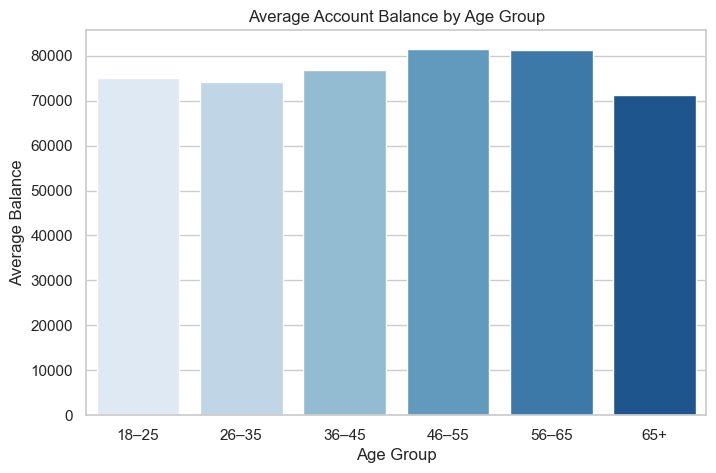

In [35]:
# Example: Average Balance by Age Group
plt.figure(figsize=(8,5))
sns.barplot(x='Age_Group', y='Balance', data=age_financials, palette='Blues')
plt.title('Average Account Balance by Age Group')
plt.ylabel('Average Balance')
plt.xlabel('Age Group')
plt.show()

#### IsActiveMember (0 = Inactive, 1 = Active)

NumOfProducts (usually ranges from 1 to 4)

Exited (1 = Churned)

In [36]:
# Group by active status and calculate churn rate
churn_by_activity = merged_df.groupby('IsActiveMember')['Exited'].mean() * 100
churn_by_activity = churn_by_activity.reset_index()

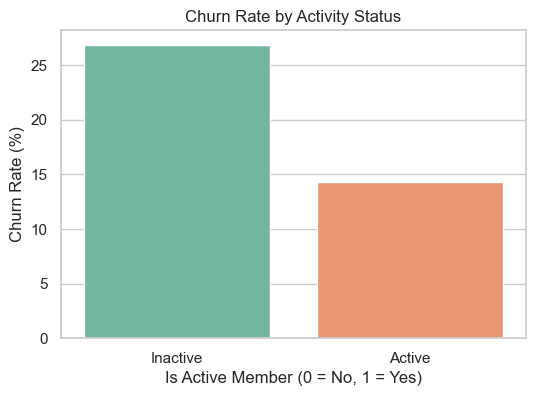

In [37]:
plt.figure(figsize=(6,4))
sns.barplot(x='IsActiveMember', y='Exited', data=churn_by_activity, palette='Set2')
plt.title('Churn Rate by Activity Status')
plt.xlabel('Is Active Member (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate (%)')
plt.xticks([0, 1], ['Inactive', 'Active'])
plt.show()

If the churn rate for IsActiveMember == 0 is higher, inactive members tend to churn more.

### Churn Rate by Number of Products

In [38]:
# Group by number of products and calculate churn rate
churn_by_products = merged_df.groupby('NumOfProducts')['Exited'].mean() * 100
churn_by_products = churn_by_products.reset_index()

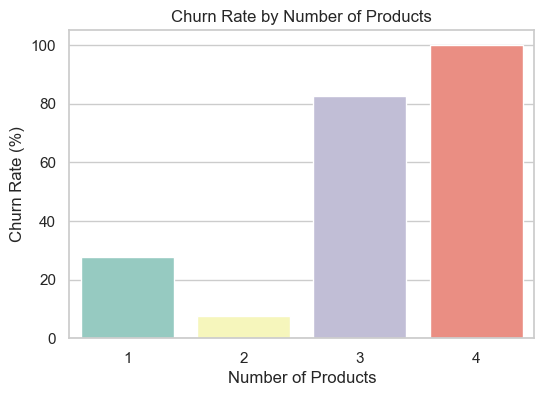

In [39]:
# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='NumOfProducts', y='Exited', data=churn_by_products, palette='Set3')
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate (%)')
plt.show()

 If churn increases as number of products increases (especially from 2 and above), then multi-product users are more likely to leave.

### Combined View (Churn by Product & Activity Status)

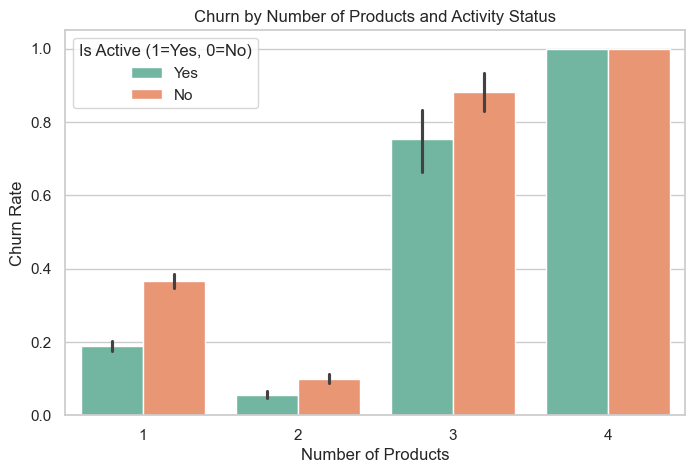

In [40]:
# Plot: Churn rate by NumOfProducts and IsActiveMember
plt.figure(figsize=(8,5))
sns.barplot(x='NumOfProducts', y='Exited', hue='IsActiveMember', data=merged_df, palette='Set2')
plt.title('Churn by Number of Products and Activity Status')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.legend(title='Is Active (1=Yes, 0=No)')
plt.show()


This helps you show, for example, that inactive users with 2+ products churn the most.

 Insight:
- Inactive members (`IsActiveMember = 0`) show a significantly higher churn rate compared to active members.
- Customers with **2 or more products** tend to churn at higher rates than those with only 1 product.
- This may indicate dissatisfaction, lack of product awareness, or poor onboarding for cross-sold products.

Recommendation: Focus on re-engaging inactive customers and improving the experience for multi-product users.


###  Compare Averages (Churned vs Non-Churned)

In [41]:
# Average balance and credit score by churn status
churn_financials = merged_df.groupby('Exited')[['Balance', 'CreditScore']].mean().reset_index()
churn_financials

,Exited,Balance,CreditScore
0,0,72739.856206,651.874497
1,1,91108.539337,645.351497


#### Exited == 0 & 1
1 group has a higher average Balance and a lower average CreditScore.

 ### Average Balance by Churn

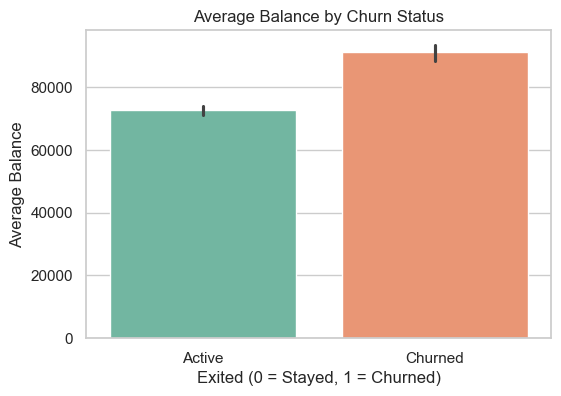

In [42]:
plt.figure(figsize=(6,4))
sns.barplot(x='Exited', y='Balance', data=merged_df, palette='Set2')
plt.title('Average Balance by Churn Status')
plt.xlabel('Exited (0 = Stayed, 1 = Churned)')
plt.ylabel('Average Balance')
plt.xticks([0, 1], ['Active', 'Churned'])
plt.show()

### Average Credit Score by Churn

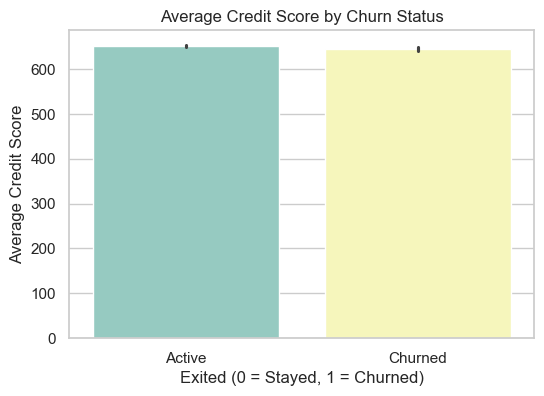

In [43]:
plt.figure(figsize=(6,4))
sns.barplot(x='Exited', y='CreditScore', data=merged_df, palette='Set3')
plt.title('Average Credit Score by Churn Status')
plt.xlabel('Exited (0 = Stayed, 1 = Churned)')
plt.ylabel('Average Credit Score')
plt.xticks([0, 1], ['Active', 'Churned'])
plt.show()

 ### Scatter Plot (Credit Score vs Balance, Colored by Churn)

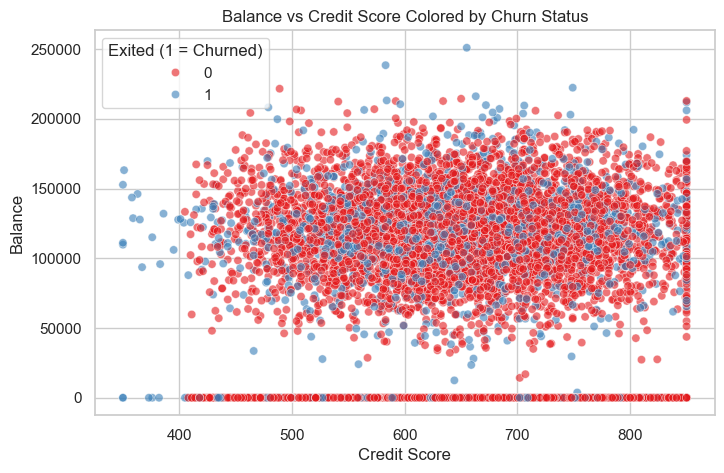

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged_df, x='CreditScore', y='Balance', hue='Exited', palette='Set1', alpha=0.6)
plt.title('Balance vs Credit Score Colored by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Balance')
plt.legend(title='Exited (1 = Churned)')
plt.show()

This lets you visually detect clusters of churned customers with low credit scores + high balances.

Insight:
- Churned customers have, on average, **higher balances** than those who stayed.
- Their **credit scores are lower**, indicating potential financial risk or a poor lending profile.
- This suggests that customers who are financially vulnerable or not well engaged (despite holding funds) are more likely to churn.

Recommendation:
- Offer financial advice or credit support to low-score customers.
- Investigate product satisfaction for high-balance users to understand and reduce churn.


### Churn by Gender

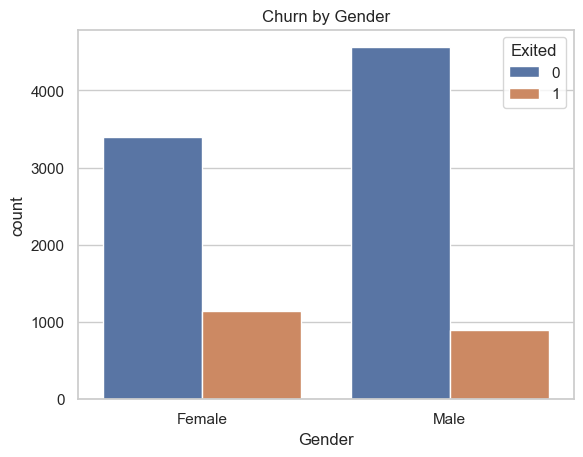

In [45]:
sns.countplot(x='Gender', hue='Exited', data=merged_df)
plt.title('Churn by Gender')
plt.show()

### Churn By Geography

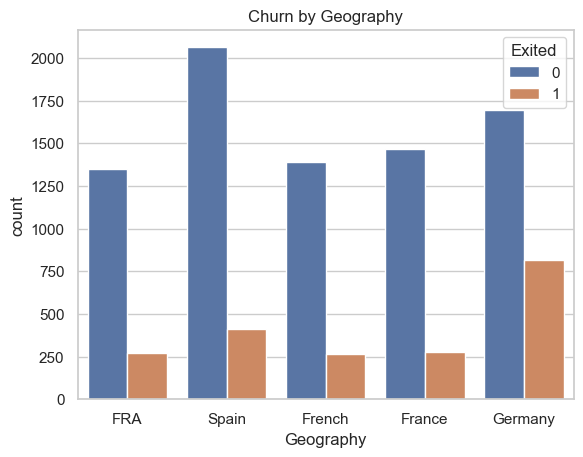

In [46]:
sns.countplot(x='Geography', hue='Exited', data=merged_df)
plt.title('Churn by Geography')
plt.show()

## Recommendations:
- Create retention programs targeting high-risk demographics.
- Reward active users to reduce inactivity churn.
- Conduct product satisfaction surveys for multi-product users.
- Educate customers on credit health to improve engagement.


In [47]:
merged_df.to_csv('Cleaned_Bank_customer_churn_data.csv', index=False)